In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#part a
#load dataset
data = load_breast_cancer()
x = data.data
y = data.target
#part b
print(data.feature_names)
print()
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


In [5]:
#part c
#split x and y to train and test for 50/50
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .5, random_state = 0)


In [6]:
#part f
dtClass = DecisionTreeClassifier(criterion='entropy', max_depth=2)
#fit tree to x and y train data sets
dtClass.fit(xTrain, yTrain)
#produce predictions for y
yPred = dtClass.predict(xTest)
#part g
print(accuracy_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))

0.8947368421052632
[[ 88  13]
 [ 17 167]]


[Text(0.5, 0.8333333333333334, 'mean concave points <= 0.049\nentropy = 0.965\nsamples = 284\nvalue = [111, 173]\nclass = benign'),
 Text(0.25, 0.5, 'worst concave points <= 0.111\nentropy = 0.198\nsamples = 163\nvalue = [5, 158]\nclass = benign'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.059\nsamples = 145\nvalue = [1, 144]\nclass = benign'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]\nclass = benign'),
 Text(0.75, 0.5, 'worst perimeter <= 114.65\nentropy = 0.541\nsamples = 121\nvalue = [106, 15]\nclass = malignant'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.994\nsamples = 33\nvalue = [18, 15]\nclass = malignant'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 88\nvalue = [88, 0]\nclass = malignant')]

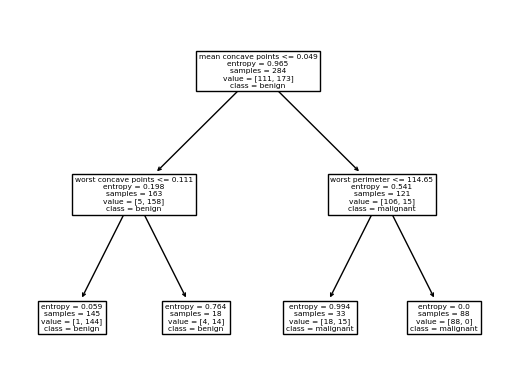

In [7]:
#part h
#plot decision tree, feature names, and target names
plot_tree(dtClass, feature_names = data.feature_names, class_names = data.target_names)

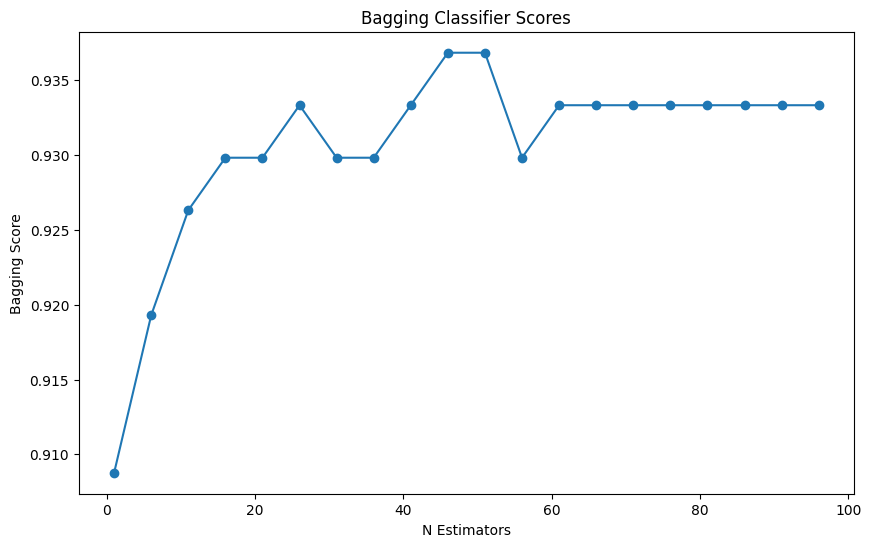

In [10]:
#part i
n_estimatorRange = np.arange(1, 101, 5)

# Record bagging score for each n_estimators
bagScoreArr = []
for n_estimators in n_estimatorRange:
    bagClass = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2), 
                                           n_estimators=n_estimators, 
                                           random_state=42)
    bagClass.fit(xTrain, yTrain)
    yPredBag = bagClass.predict(xTest)
    bagScore = accuracy_score(yTest, yPredBag)
    bagScoreArr.append(bagScore)

# Plot bagging scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimatorRange, bagScoreArr, marker='o')
plt.xlabel('N Estimators')
plt.ylabel('Bagging Score')
plt.title('Bagging Classifier Scores')
plt.show()

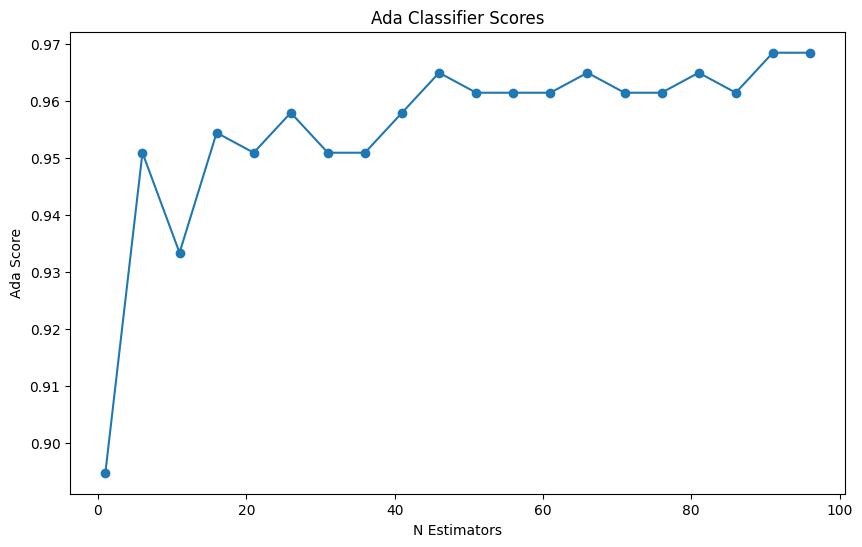

In [11]:
#part j
# Record bagging score for each n_estimators
# Varying n_estimators from 1 to 100
n_estimatorRange = np.arange(1, 101, 5)

adaScoreArr = []
for n_estimators in n_estimatorRange:
    adaClass = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2), 
                                           n_estimators=n_estimators, 
                                           random_state=42)
    adaClass.fit(xTrain, yTrain)
    yPredAda = adaClass.predict(xTest)
    adaScore = accuracy_score(yTest, yPredAda)
    adaScoreArr.append(adaScore)

# Plot bagging scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimatorRange, adaScoreArr, marker='o')
plt.xlabel('N Estimators')
plt.ylabel('Ada Score')
plt.title('Ada Classifier Scores')
plt.show()

In [12]:
#part k
# Record bagging score for each n_estimators
# Varying n_estimators from 1 to 100
maxFeatureRange = np.arange(1, x.shape[1] + 1)

forestScoreArr = []
for maxFeature in maxFeatureRange:
    rfClass = RandomForestClassifier(max_features= maxFeature, n_estimators=100, random_state=42) 
                                
    rfClass.fit(xTrain, yTrain)
    yPredRf = rfClass.predict(xTest)
    forestScore = accuracy_score(yTest, yPredRf)
    forestScoreArr.append(forestScore)

# Plot bagging scores
plt.figure(figsize=(10, 6))
plt.plot(maxFeatureRange, forestScoreArr, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Forest Score')
plt.title('Random Forest Classifier Scores')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'estimator'